In [44]:
import torch
import torch.nn as nn
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

In [45]:
torch.manual_seed(42)

In [46]:
n_pts = 500
centers = [[-0.5, 0.5], [0.5, -0.5]]
x, y = datasets.make_circles(n_pts, random_state=42, noise=0.1, factor=0.2)

In [47]:
def scatter_plot():
    plt.figure(figsize=(10,10))
    plt.scatter(x[:, 0], x[:, 1], c=y)

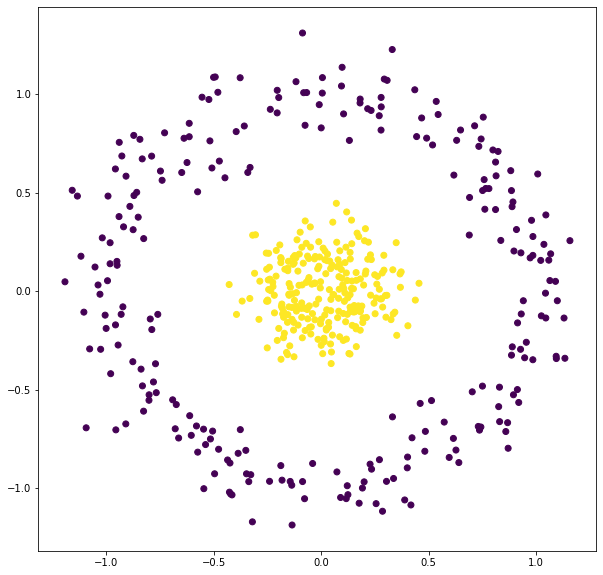

In [48]:
scatter_plot()

In [49]:
x_data = torch.tensor(x)
y_data = torch.tensor(y.reshape(n_pts, 1))

In [50]:
class Model(nn.Module):
    def __init__(self, input_size, h1, output_size):
        super().__init__()
        self.linear1 = nn.Linear(input_size, h1)
        nn.init.kaiming_uniform(self.linear1.weight)
        self.linear2 = nn.Linear(h1, output_size)
        nn.init.kaiming_uniform(self.linear2.weight)

    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))
        y_hat = torch.sigmoid(self.linear2(x))
        return y_hat
    
    def predict(self, x):
        y_hat = self.forward(x)
        return 1 if y_hat>=0.5 else 0

In [51]:
model = Model(2, 3, 1)

/Users/kirillvladimirov/PycharmProjects/cv_projects/venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: nn.init.kaiming_uniform is now deprecated in favor of nn.init.kaiming_uniform_.
  """
/Users/kirillvladimirov/PycharmProjects/cv_projects/venv/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: nn.init.kaiming_uniform is now deprecated in favor of nn.init.kaiming_uniform_.
  import sys


In [52]:
list(model.parameters())

[Parameter containing:
 tensor([[-1.2707,  1.5055],
         [ 0.3242,  1.2797],
         [ 0.2346,  0.8352]], requires_grad=True), Parameter containing:
 tensor([-0.3443,  0.4153,  0.6233], requires_grad=True), Parameter containing:
 tensor([[ 0.3605, -0.6516, -0.1658]], requires_grad=True), Parameter containing:
 tensor([-0.2695], requires_grad=True)]

In [53]:
criterian = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [54]:
epochs = 2000
losses = []

for i in range(epochs):
    y_hat = model.forward(x_data.float())
    loss = criterian(y_hat, y_data.float())
#     print(f"epoch: {i}, loss: {loss.item()}.")
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

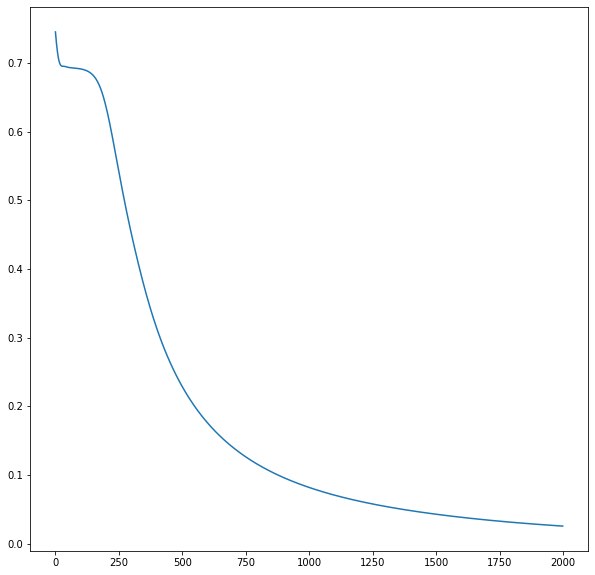

In [55]:
plt.figure(figsize=(10,10))
plt.plot(range(epochs), losses)

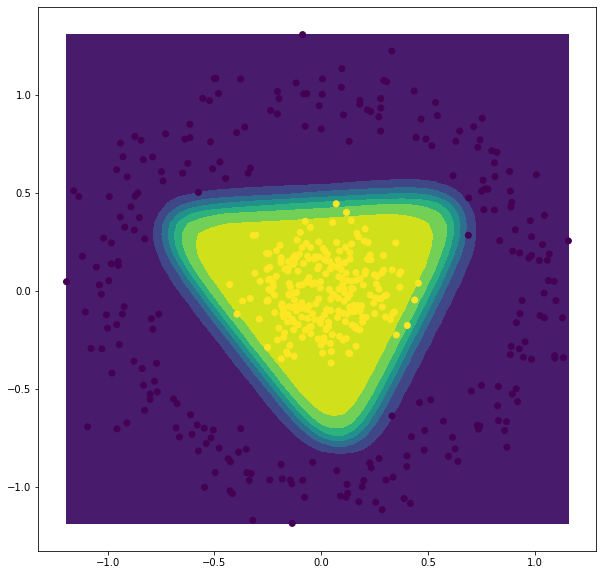

In [56]:
x_span = np.linspace(min(x[:,0]), max(x[:, 0]))
y_span = np.linspace(min(x[:,1]), max(x[:, 1]))
xx, yy = np.meshgrid(x_span, y_span)
grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
pred_func = model.forward(grid)
z = pred_func.view(xx.shape).detach().numpy()

plt.figure(figsize=(10,10))
plt.contourf(xx, yy, z)
plt.scatter(x[:, 0], x[:, 1], c=y)